In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import Audio

from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, BatchNormalization
from keras.layers import Embedding, LSTM, GRU, Input, Activation, AveragePooling1D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import sequence

from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ravdess = "/content/drive/My Drive/Datasets/Ravdess/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_21', 'Actor_24', 'Actor_22', 'Actor_20', 'Actor_23', 'Actor_15', 'Actor_16', 'Actor_19', 'Actor_18', 'Actor_17', 'Actor_14', 'Actor_11', 'Actor_10', 'Actor_12', 'Actor_13', 'Actor_09', 'Actor_06', 'Actor_08', 'Actor_05', 'Actor_07', 'Actor_01', 'Actor_04', 'Actor_03', 'Actor_02']


In [4]:
Crema = "/content/drive/My Drive/Datasets/Crema/"
Tess = "/content/drive/My Drive/Datasets/Tess/"
Savee = "/content/drive/My Drive/Datasets/Savee/"

In [5]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)


In [6]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-02.wav
03
/content/drive/My Drive/Datasets/Ravdess/audio_speech_actors_01-24/Actor_21/03-01-02-02-01-01-21.wav
8
03-01-08-02-01-01-02.wav


In [7]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  /content/drive/My Drive/Datasets/Ravdess/audio...
1  neutral  /content/drive/My Drive/Datasets/Ravdess/audio...
2      sad  /content/drive/My Drive/Datasets/Ravdess/audio...
3    happy  /content/drive/My Drive/Datasets/Ravdess/audio...
4  neutral  /content/drive/My Drive/Datasets/Ravdess/audio...
______________________________________________
      Emotions                                               Path
1435  surprise  /content/drive/My Drive/Datasets/Ravdess/audio...
1436  surprise  /content/drive/My Drive/Datasets/Ravdess/audio...
1437   disgust  /content/drive/My Drive/Datasets/Ravdess/audio...
1438  surprise  /content/drive/My Drive/Datasets/Ravdess/audio...
1439  surprise  /content/drive/My Drive/Datasets/Ravdess/audio...
_______________________________________________
neutral     288
sad         192
happy       192
angry       192
disgust     192
fear        192
surprise    192
Name: Emotions, dtype: in

In [8]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

 # dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

sad        1271
fear       1271
angry      1271
disgust    1271
happy      1271
neutral    1087
Name: Emotions, dtype: int64


In [9]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

surprise    400
sad         400
neutral     400
disgust     400
happy       400
angry       400
fear        400
Name: Emotions, dtype: int64


In [10]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

neutral     120
angry        60
disgust      60
happy        60
fear         60
sad          60
surprise     60
Name: Emotions, dtype: int64


In [11]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/drive/My Drive/Datasets/Ravdess/audio...
1,neutral,/content/drive/My Drive/Datasets/Ravdess/audio...
2,sad,/content/drive/My Drive/Datasets/Ravdess/audio...
3,happy,/content/drive/My Drive/Datasets/Ravdess/audio...
4,neutral,/content/drive/My Drive/Datasets/Ravdess/audio...


In [12]:
print(data_path.Emotions.value_counts())

sad         1923
happy       1923
angry       1923
disgust     1923
fear        1923
neutral     1895
surprise     652
Name: Emotions, dtype: int64


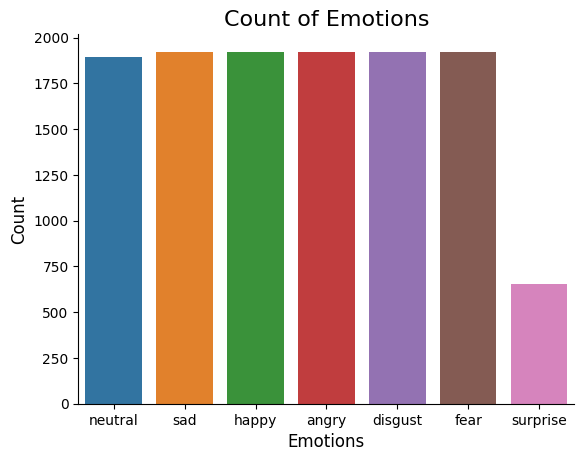

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path , x="Emotions")
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
data,sr = librosa.load(file_path[0])
sr

22050

In [15]:
ipd.Audio(data,rate=sr)

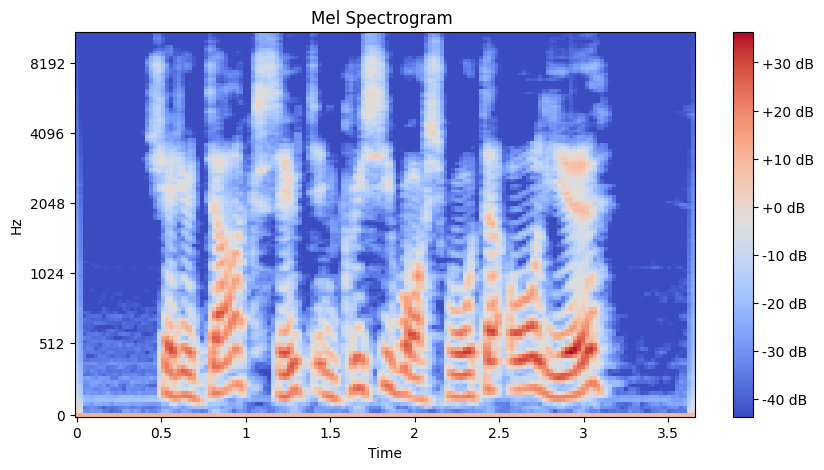

In [16]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

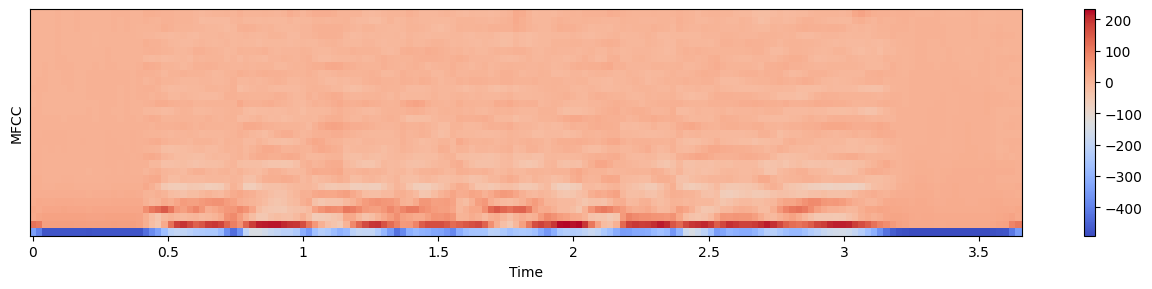

In [17]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [18]:
# Add noise
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate=0.8)

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
 
# PITCH
def pitch(data, sampling_rate, n_steps):
    return librosa.effects.pitch_shift(data, sampling_rate, n_steps=0.7)

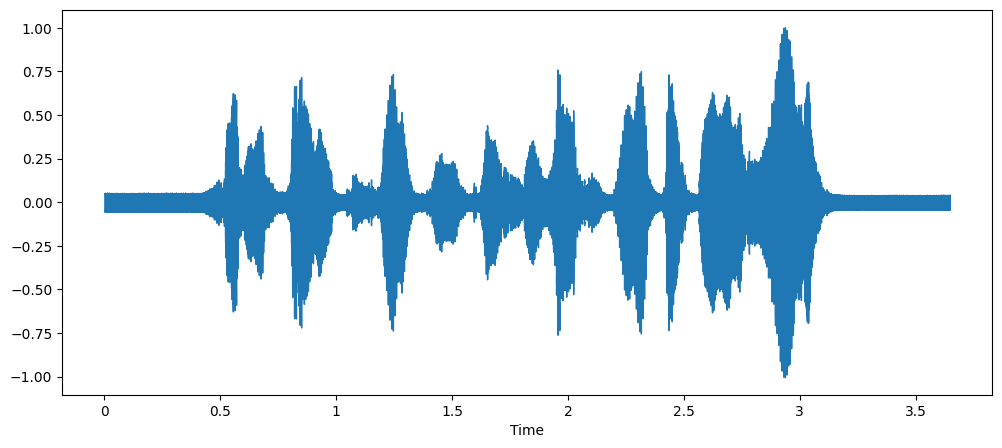

In [19]:
# NORMAL AUDIO

import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

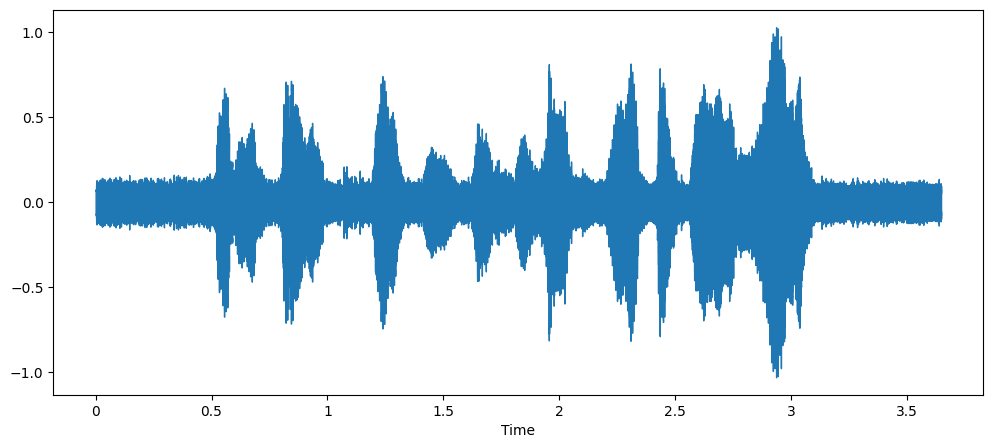

In [20]:
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

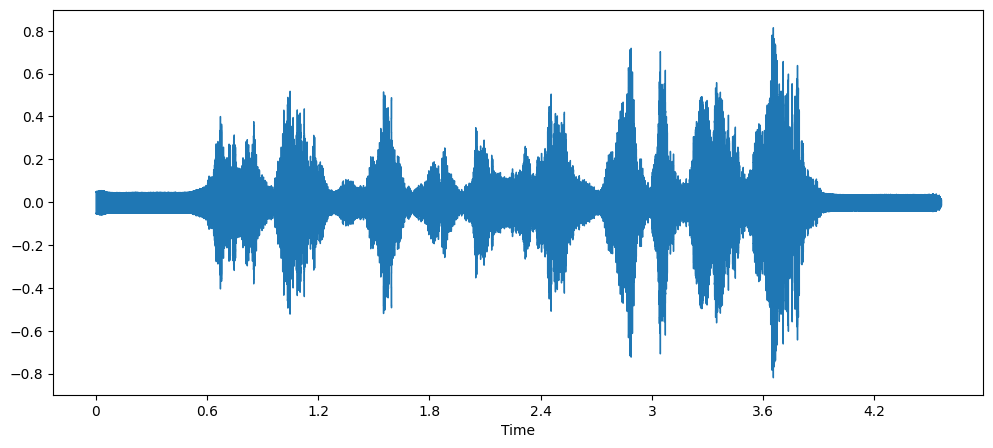

In [21]:
# STRETCHED AUDIO
x = stretch(data , 0.8)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

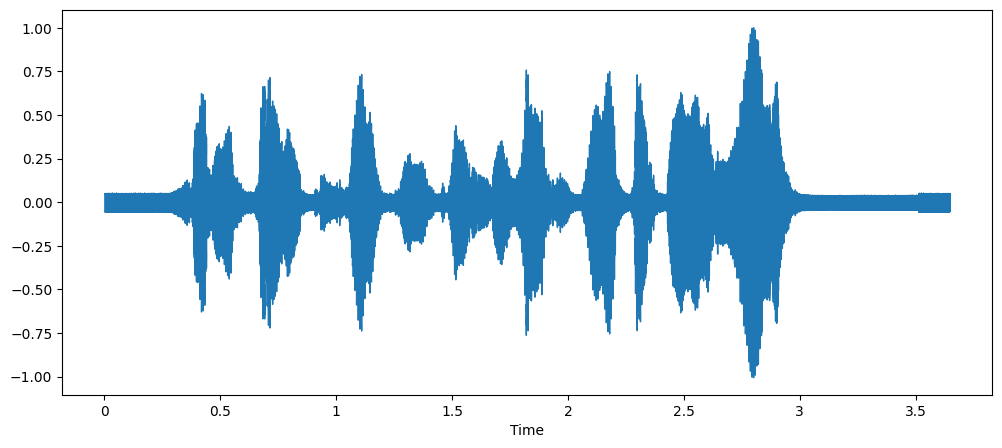

In [22]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

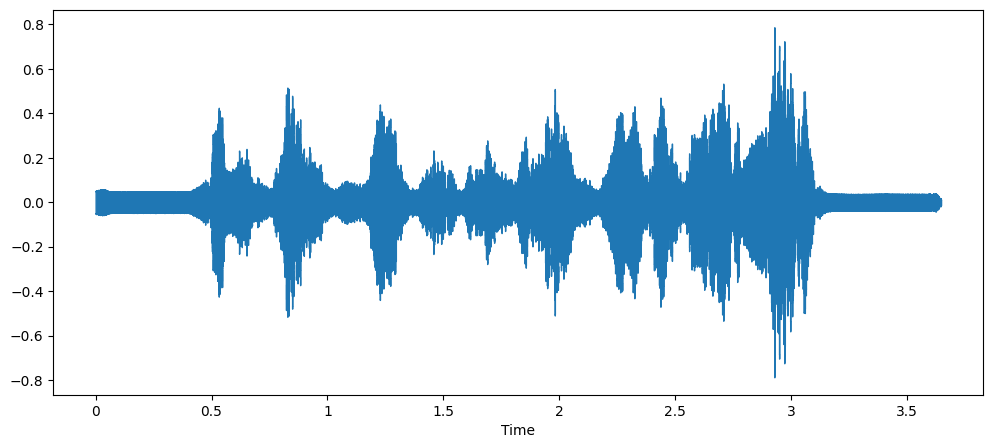

In [23]:
# AUDIO WITH PITCH
x = pitch(data, sr, 0.7)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [24]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length,hop_length):
    rmse=librosa.feature.rms(y = data ,frame_length=2048,hop_length=512)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y = data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,2048,512),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr,n_steps=0.7)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr,n_steps = 0.7)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [25]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [26]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:00,  1.99it/s]

0 audio has been processed


501it [04:54,  1.69it/s]

500 audio has been processed


1001it [09:40,  2.06it/s]

1000 audio has been processed


1501it [14:25,  1.99it/s]

1500 audio has been processed


2001it [18:50,  2.00it/s]

2000 audio has been processed


2501it [23:14,  1.72it/s]

2500 audio has been processed


3001it [27:39,  1.97it/s]

3000 audio has been processed


3501it [32:01,  1.93it/s]

3500 audio has been processed


4001it [36:23,  1.98it/s]

4000 audio has been processed


4501it [40:38,  1.98it/s]

4500 audio has been processed


5001it [44:56,  1.68it/s]

5000 audio has been processed


5501it [49:16,  1.93it/s]

5500 audio has been processed


6001it [53:43,  1.67it/s]

6000 audio has been processed


6501it [58:06,  2.22it/s]

6500 audio has been processed


7001it [1:02:16,  1.71it/s]

7000 audio has been processed


7501it [1:06:38,  2.19it/s]

7500 audio has been processed


8001it [1:10:47,  2.47it/s]

8000 audio has been processed


8501it [1:14:42,  1.78it/s]

8500 audio has been processed


9001it [1:18:44,  1.94it/s]

9000 audio has been processed


9501it [1:22:42,  2.17it/s]

9500 audio has been processed


10001it [1:26:54,  2.20it/s]

10000 audio has been processed


10501it [1:30:55,  2.60it/s]

10500 audio has been processed


11001it [1:34:49,  1.87it/s]

11000 audio has been processed


11501it [1:38:49,  2.34it/s]

11500 audio has been processed


12001it [1:43:14,  1.85it/s]

12000 audio has been processed


12162it [1:44:43,  1.94it/s]

Done
Time:  6283.784242199


In [27]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

In [28]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.117676,0.181641,0.232422,0.236816,0.250000,0.249512,0.266113,0.297363,0.355469,0.458496,...,-3.034874,-7.721661,3.422156,-8.932870,-5.502668,5.365537,-2.859212,-4.011598,5.572346,neutral
1,0.243652,0.364258,0.483887,0.489258,0.490234,0.498047,0.508789,0.506836,0.507812,0.504883,...,0.160732,-5.806057,-3.362556,-2.154411,-3.682049,-3.236583,0.832059,2.031531,1.879011,neutral
2,0.117676,0.169922,0.222168,0.218262,0.208008,0.205566,0.197266,0.196777,0.203125,0.200195,...,-6.937782,-3.847099,2.412901,-9.143721,0.701466,7.146825,-10.390354,-2.039428,0.121145,neutral
3,0.248535,0.368652,0.491211,0.474121,0.485352,0.489258,0.487793,0.506836,0.505859,0.509277,...,-2.094002,-6.374463,-1.263988,1.575046,-1.728655,-0.840629,-3.452983,-3.023663,2.719815,neutral
4,0.127930,0.193848,0.262207,0.271973,0.273438,0.298828,0.325684,0.416992,0.546387,0.670410,...,-18.710144,9.695335,10.506333,7.358395,-9.695586,11.957130,-6.484877,-13.399317,9.400708,neutral


In [29]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.117676,0.181641,0.232422,0.236816,0.250000,0.249512,0.266113,0.297363,0.355469,0.458496,...,-3.034874,-7.721661,3.422156,-8.932870,-5.502668,5.365537,-2.859212,-4.011598,5.572346,neutral
1,0.243652,0.364258,0.483887,0.489258,0.490234,0.498047,0.508789,0.506836,0.507812,0.504883,...,0.160732,-5.806057,-3.362556,-2.154411,-3.682049,-3.236583,0.832059,2.031531,1.879011,neutral
2,0.117676,0.169922,0.222168,0.218262,0.208008,0.205566,0.197266,0.196777,0.203125,0.200195,...,-6.937782,-3.847099,2.412901,-9.143721,0.701466,7.146825,-10.390354,-2.039428,0.121145,neutral
3,0.248535,0.368652,0.491211,0.474121,0.485352,0.489258,0.487793,0.506836,0.505859,0.509277,...,-2.094002,-6.374463,-1.263988,1.575046,-1.728655,-0.840629,-3.452983,-3.023663,2.719815,neutral
4,0.127930,0.193848,0.262207,0.271973,0.273438,0.298828,0.325684,0.416992,0.546387,0.670410,...,-18.710144,9.695335,10.506333,7.358395,-9.695586,11.957130,-6.484877,-13.399317,9.400708,neutral


In [30]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [31]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(48648, 2377)

In [32]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [33]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [35]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 2376)

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [38]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [39]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

In [40]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [41]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(x_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [42]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
609/609 [==============================] - ETA: 0s - loss: 1.3578 - accuracy: 0.4819

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


609/609 [==============================] - 231s 345ms/step - loss: 1.3578 - accuracy: 0.4819 - val_loss: 1.2929 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 2/50
609/609 [==============================] - ETA: 0s - loss: 1.0697 - accuracy: 0.5904

609/609 [==============================] - 212s 347ms/step - loss: 1.0697 - accuracy: 0.5904 - val_loss: 1.0356 - val_accuracy: 0.6007 - lr: 0.0010
Epoch 3/50
609/609 [==============================] - ETA: 0s - loss: 0.9365 - accuracy: 0.6414

609/609 [==============================] - 204s 334ms/step - loss: 0.9365 - accuracy: 0.6414 - val_loss: 0.9233 - val_accuracy: 0.6546 - lr: 0.0010
Epoch 4/50
609/609 [==============================] - ETA: 0s - loss: 0.8384 - accuracy: 0.6829

609/609 [==============================] - 203s 333ms/step - loss: 0.8384 - accuracy: 0.6829 - val_loss: 0.8546 - val_accuracy: 0.6763 - lr: 0.0010
Epoch 5/50
609/609 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.7326

609/609 [==============================] - 202s 333ms/step - loss: 0.7095 - accuracy: 0.7326 - val_loss: 0.8767 - val_accuracy: 0.6740 - lr: 0.0010
Epoch 6/50
609/609 [==============================] - ETA: 0s - loss: 0.6550 - accuracy: 0.7544

609/609 [==============================] - 203s 333ms/step - loss: 0.6550 - accuracy: 0.7544 - val_loss: 0.5716 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 7/50
609/609 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.8398

609/609 [==============================] - 211s 346ms/step - loss: 0.4426 - accuracy: 0.8398 - val_loss: 0.6570 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 8/50
609/609 [==============================] - ETA: 0s - loss: 0.3188 - accuracy: 0.8870

609/609 [==============================] - 211s 346ms/step - loss: 0.3188 - accuracy: 0.8870 - val_loss: 0.6891 - val_accuracy: 0.7645 - lr: 0.0010
Epoch 9/50
609/609 [==============================] - ETA: 0s - loss: 0.3194 - accuracy: 0.8877

609/609 [==============================] - 211s 347ms/step - loss: 0.3194 - accuracy: 0.8877 - val_loss: 0.3604 - val_accuracy: 0.8727 - lr: 0.0010
Epoch 10/50
609/609 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.9429

609/609 [==============================] - 211s 347ms/step - loss: 0.1717 - accuracy: 0.9429 - val_loss: 0.3129 - val_accuracy: 0.8915 - lr: 0.0010
Epoch 11/50
609/609 [==============================] - ETA: 0s - loss: 0.1341 - accuracy: 0.9560

609/609 [==============================] - 211s 346ms/step - loss: 0.1341 - accuracy: 0.9560 - val_loss: 0.3875 - val_accuracy: 0.8717 - lr: 0.0010
Epoch 12/50
609/609 [==============================] - ETA: 0s - loss: 0.1824 - accuracy: 0.9389

609/609 [==============================] - 211s 347ms/step - loss: 0.1824 - accuracy: 0.9389 - val_loss: 0.1925 - val_accuracy: 0.9335 - lr: 0.0010
Epoch 13/50
609/609 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9661

609/609 [==============================] - 212s 347ms/step - loss: 0.1018 - accuracy: 0.9661 - val_loss: 0.1427 - val_accuracy: 0.9505 - lr: 0.0010
Epoch 14/50
609/609 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9703

609/609 [==============================] - 203s 333ms/step - loss: 0.0863 - accuracy: 0.9703 - val_loss: 0.1958 - val_accuracy: 0.9359 - lr: 0.0010
Epoch 15/50
609/609 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.9542

609/609 [==============================] - 203s 333ms/step - loss: 0.1349 - accuracy: 0.9542 - val_loss: 0.1491 - val_accuracy: 0.9475 - lr: 0.0010
Epoch 16/50
609/609 [==============================] - ETA: 0s - loss: 0.0638 - accuracy: 0.9801

609/609 [==============================] - 203s 334ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0924 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 17/50
609/609 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9776

609/609 [==============================] - 203s 333ms/step - loss: 0.0690 - accuracy: 0.9776 - val_loss: 0.1024 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 18/50
609/609 [==============================] - ETA: 0s - loss: 0.0682 - accuracy: 0.9774

609/609 [==============================] - 203s 333ms/step - loss: 0.0682 - accuracy: 0.9774 - val_loss: 0.0804 - val_accuracy: 0.9764 - lr: 0.0010
Epoch 19/50
609/609 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9862

609/609 [==============================] - 203s 333ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.1687 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 20/50
609/609 [==============================] - ETA: 0s - loss: 0.1715 - accuracy: 0.9460

609/609 [==============================] - 211s 346ms/step - loss: 0.1715 - accuracy: 0.9460 - val_loss: 0.0873 - val_accuracy: 0.9729 - lr: 0.0010
Epoch 21/50
609/609 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9807

609/609 [==============================] - 211s 346ms/step - loss: 0.0601 - accuracy: 0.9807 - val_loss: 0.0689 - val_accuracy: 0.9799 - lr: 0.0010
Epoch 22/50
609/609 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9910

609/609 [==============================] - 211s 346ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.0566 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 23/50
609/609 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9885

609/609 [==============================] - 211s 346ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0903 - val_accuracy: 0.9713 - lr: 0.0010
Epoch 24/50
609/609 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9907

609/609 [==============================] - 211s 346ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0639 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 25/50
609/609 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9879

609/609 [==============================] - 211s 346ms/step - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.0759 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 26/50
609/609 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9861

609/609 [==============================] - 203s 333ms/step - loss: 0.0408 - accuracy: 0.9861 - val_loss: 0.1059 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 27/50
609/609 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9853

609/609 [==============================] - 211s 346ms/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 0.1093 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 28/50
609/609 [==============================] - ETA: 0s - loss: 0.0762 - accuracy: 0.9745

609/609 [==============================] - 211s 346ms/step - loss: 0.0762 - accuracy: 0.9745 - val_loss: 0.0659 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 29/50
609/609 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9865

609/609 [==============================] - 203s 333ms/step - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.0639 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 30/50
609/609 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9860

609/609 [==============================] - 211s 346ms/step - loss: 0.0417 - accuracy: 0.9860 - val_loss: 0.0666 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 31/50
609/609 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9905

609/609 [==============================] - 211s 346ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0660 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 32/50
609/609 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9911

609/609 [==============================] - 211s 347ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0594 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 33/50
609/609 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9923

609/609 [==============================] - 211s 346ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0583 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 34/50
609/609 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9851

609/609 [==============================] - 203s 333ms/step - loss: 0.0444 - accuracy: 0.9851 - val_loss: 0.0663 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 35/50
609/609 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9910

609/609 [==============================] - 203s 333ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0683 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 36/50
609/609 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9925

609/609 [==============================] - 204s 335ms/step - loss: 0.0214 - accuracy: 0.9925 - val_loss: 0.0594 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 37/50
609/609 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9913

609/609 [==============================] - 211s 346ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0869 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 38/50
609/609 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9756

609/609 [==============================] - 203s 334ms/step - loss: 0.0749 - accuracy: 0.9756 - val_loss: 0.0585 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 39/50
609/609 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9942

609/609 [==============================] - 211s 347ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0525 - val_accuracy: 0.9853 - lr: 0.0010
Epoch 40/50
609/609 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9941

609/609 [==============================] - 211s 346ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0620 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 41/50
609/609 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9926

609/609 [==============================] - 211s 346ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0863 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 42/50
609/609 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9883

609/609 [==============================] - 212s 347ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0613 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 43/50
609/609 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9948

609/609 [==============================] - 211s 346ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0647 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 44/50
609/609 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9825

609/609 [==============================] - 203s 334ms/step - loss: 0.0543 - accuracy: 0.9825 - val_loss: 0.0620 - val_accuracy: 0.9861 - lr: 0.0010
Epoch 45/50
609/609 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9903

609/609 [==============================] - 211s 347ms/step - loss: 0.0281 - accuracy: 0.9903 - val_loss: 0.0465 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 46/50
609/609 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9963

609/609 [==============================] - 204s 334ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0422 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 47/50
609/609 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9943

609/609 [==============================] - 203s 334ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0430 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 48/50
609/609 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9948

609/609 [==============================] - 203s 333ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0782 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 49/50
609/609 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9895

609/609 [==============================] - 203s 333ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0658 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 50/50
609/609 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9944

609/609 [==============================] - 211s 347ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0715 - val_accuracy: 0.9846 - lr: 0.0010


305/305 [==============================] - 18s 56ms/step - loss: 0.0715 - accuracy: 0.9846
Accuracy of our model on test data :  98.45837354660034 %


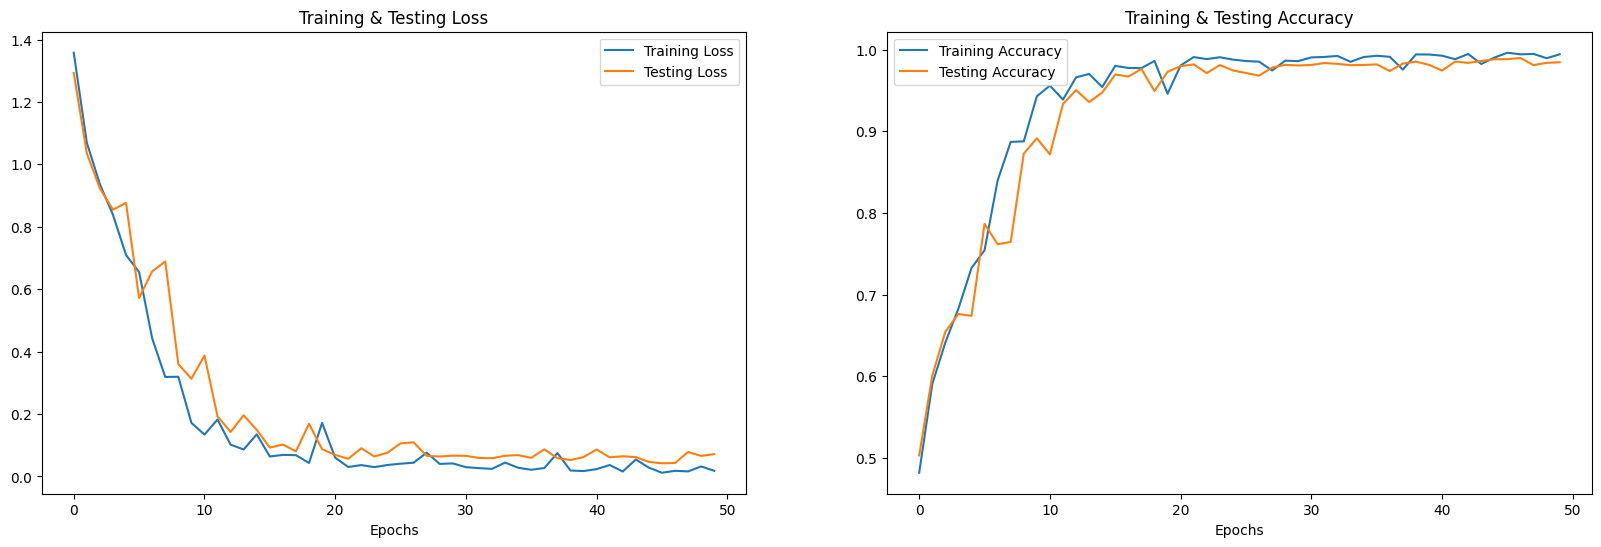

In [43]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [44]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

305/305 [==============================] - 17s 55ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,fear,fear
2,angry,angry
3,sad,sad
4,disgust,disgust
5,angry,angry
6,happy,happy
7,neutral,neutral
8,surprise,surprise
9,fear,fear


In [45]:
df0

,Predicted Labels,Actual Labels
0,neutral,neutral
1,fear,fear
2,angry,angry
3,sad,sad
4,disgust,disgust
...,...,...
9725,surprise,surprise
9726,angry,angry
9727,fear,fear
9728,sad,sad


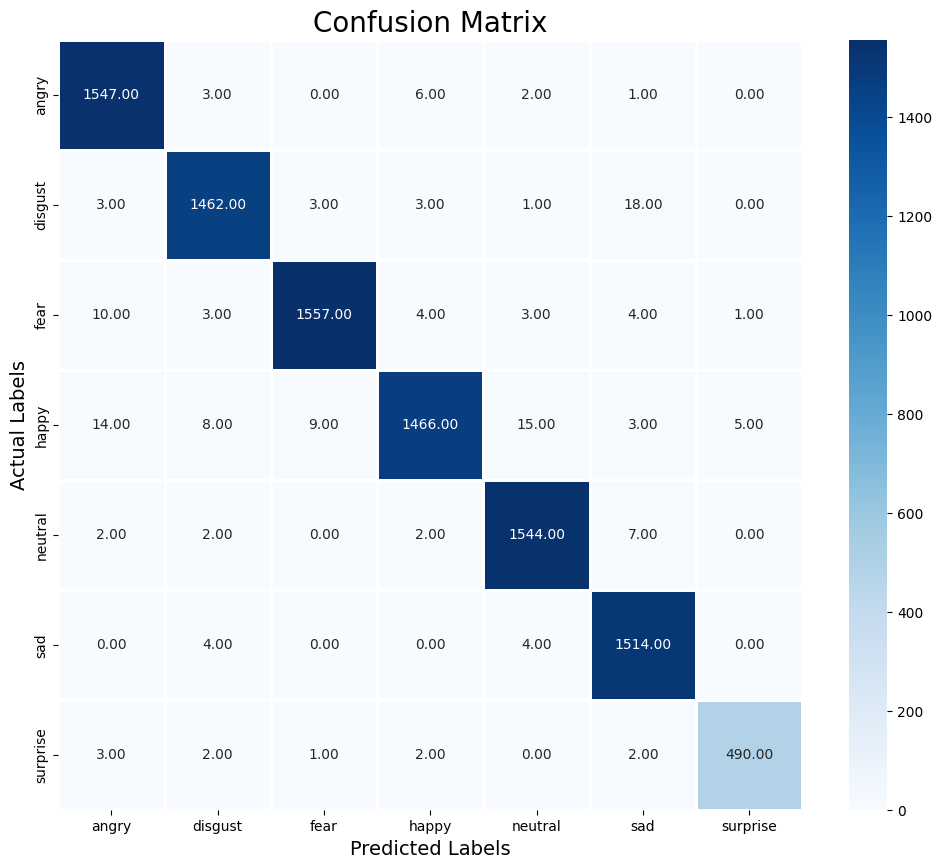

              precision    recall  f1-score   support

       angry       0.98      0.99      0.99      1559
     disgust       0.99      0.98      0.98      1490
        fear       0.99      0.98      0.99      1582
       happy       0.99      0.96      0.98      1520
     neutral       0.98      0.99      0.99      1557
         sad       0.98      0.99      0.99      1522
    surprise       0.99      0.98      0.98       500

    accuracy                           0.98      9730
   macro avg       0.98      0.98      0.98      9730
weighted avg       0.98      0.98      0.98      9730



In [46]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [47]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [49]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

305/305 [==============================] - 18s 57ms/step - loss: 0.0430 - accuracy: 0.9898
accuracy: 98.98%


In [50]:
import pickle


# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [54]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [55]:
res=get_predict_feat("/content/drive/My Drive/Datasets/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-07-01-01-01-01.wav")
print(res.shape)

(1, 2376, 1)


In [56]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [57]:
prediction("/content/drive/My Drive/Datasets/Ravdess/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")

1/1 [==============================] - 2s 2s/step
fear
